# Escola de Dados - Python para inovação cívica
## Módulo 1: Noções básicas de estatística descritiva e pré-processamento

- [Aula 8](#Aula-8:-Introdução-a-estatística)
- [Aula 9](#Aula-9:-Medidas-de-tendência-central-e-dispersão)
- [Aula 10](#Aula-10:-Outliers-e-valores-faltantes)
- [Aula 12](#Aula-12:-Operações-básicas-com-python)
- [Aula 13](#Aula-13:-Métodos-`filter`-e-`sort_values`)
- [Aula 14](#Aula-14:-Operações-com-dados-e-método-`apply`)
- [Aula 15](#Aula-15:-Operações-com-dados-e-método-`groupby`)


### Aula 8: Introdução a estatística

Os dados que usaremos nesse notebook pode ser encontrado em: [TSE. Candidaturas em 2020](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1).

Trabalharemos com os dados referentes as candidaturas nos estados de Amapá e Pará.


In [1]:
import pandas as pd
import glob

In [2]:
dados_ap_pa = ['base_dados/consulta_cand_2020_AP.csv', 'base_dados/consulta_cand_2020_PA.csv']

In [3]:
lista_df = []

for dados_estado in dados_ap_pa:
    df_estado = pd.read_csv(dados_estado, sep=';', encoding='latin_1')
    lista_df.append(df_estado)

In [4]:
df_completo = pd.concat(lista_df, axis=0, ignore_index=True)

É possível criar um dataframe apenas com os dados de candidaturas para as Câmeras de Vereados dos estados.

In [5]:
df_vereadores = df_completo[df_completo['CD_CARGO'] == 13].copy()

In [6]:
df_vereadores.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTAD

O método `pd.describe` traz um quadro com algumas medidas da estatística descritiva, como as medidas de tendência central, medidas de dispersão e quartis, excluindo os valores NaN (not a number).

In [7]:
df_vereadores.shape

(24583, 71)

In [8]:
df_vereadores.describe()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,SG_UE,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,CD_SITUACAO_CANDIDATURA,...,CD_ESTADO_CIVIL,CD_COR_RACA,CD_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,CD_SITUACAO_CANDIDATO_TOT
count,24583.0,24583.0,24583.0,24583.000000,24583.000000,24583.0,2.458300e+04,24583.000000,2.458300e+04,24583.000000,...,24583.000000,24583.000000,24583.000000,24583.000000,24583.000000,24583.0,2.458300e+04,24583.000000,24583.000000,24583.000000
mean,2020.0,2.0,1.0,426.408860,4934.148314,13.0,1.296959e+11,31086.054875,4.780648e+10,11.494773,...,2.224952,2.596022,552.461376,59365.732494,4.288614,-1.0,6.002713e+18,2.055974,2.088679,2.106374
std,0.0,0.0,0.0,2.757078,663.648303,0.0,3.205320e+10,20829.576759,3.104649e+10,2.071706,...,1.837225,0.888529,326.046922,93041.750641,1.283715,0.0,1.704343e+15,1.468889,1.624685,1.618616
min,2020.0,2.0,1.0,426.000000,4006.000000,13.0,3.000063e+10,10000.000000,-4.000000e+00,3.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-1.000000,-1.0,6.000168e+18,-1.000000,-1.000000,-1.000000
25%,2020.0,2.0,1.0,426.000000,4332.000000,13.0,1.400008e+11,15015.000000,1.955834e+10,12.000000,...,1.000000,2.000000,265.000000,15568.960000,4.000000,-1.0,6.001442e+18,2.000000,2.000000,2.000000
50%,2020.0,2.0,1.0,426.000000,4774.000000,13.0,1.400009e+11,22300.000000,5.162824e+10,12.000000,...,1.000000,3.000000,541.000000,24713.500000,5.000000,-1.0,6.002299e+18,2.000000,2.000000,2.000000
75%,2020.0,2.0,1.0,426.000000,5517.000000,13.0,1.400011e+11,45133.000000,7.379923e+10,12.000000,...,3.000000,3.000000,999.000000,53698.780000,5.000000,-1.0,6.003640e+18,2.000000,2.000000,2.000000
max,2020.0,2.0,1.0,445.000000,6173.000000,13.0,1.400013e+11,90999.000000,9.998375e+10,12.000000,...,9.000000,6.000000,999.000000,438043.030000,5.000000,-1.0,6.016571e+18,20.000000,20.000000,20.000000


Para gerar relatórios interativos em HTML a partir de um dataframe do pandas usaremos a biblioteca Pandas Profiling, com ele para cada coluna será apresentado estatístico correspondente ao tipo de dado.

In [25]:
#pip install ydata-profiling

  Using cached ydata_profiling-4.3.1-py2.py3-none-any.whl (352 kB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached statsmodels-0.14.0-cp311-cp311-win_amd64.whl (9.2 MB)
  Using cached wordcloud-1.9.2-cp311-cp311-win_amd64.whl (151 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [10]:
import pandas as pd
from ydata_profiling import ProfileReport

In [11]:
profile = ProfileReport(df_vereadores, title="Introdução - Pandas Profiling Report")

In [12]:
profile.to_file(output_file="relatorio_eleicoes_vereadores_2020_ap_pa.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Em AP e PA, houveram quantas candidaturas para a prefeitura?

In [9]:
pd.unique(df_completo['CD_CARGO'])


array([13, 12, 11], dtype=int64)

In [10]:
df_prefeitos = df_completo[df_completo['CD_CARGO'] == 11].copy()

df_prefeitos

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
20,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6002333620206030007,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
41,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6003158520206030001,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
128,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6002809220206030012,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
226,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6003349120206030001,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
286,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6002315420206030011,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25994,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6002654220206140037,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
26006,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6002996520206140021,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
26063,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6004048220206140040,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
26089,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6003045120206140033,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


### Aula 9: medidas de tendência central e dispersão

As medidas de tendência central servem para determinar o valor central de uma distribuição. Vamos explorar mais um pouco nosso dataframe e descobrir qual a moda (valor que mais se repete) da colina 'SG_PARTIDO'

In [11]:
df_vereadores['SG_PARTIDO'].mode()

0    MDB
Name: SG_PARTIDO, dtype: object

A média aritmética da coluna 'NR_IDADE_DATA_POSSE' é:

In [12]:
df_vereadores['NR_IDADE_DATA_POSSE'].mean()

43.164185176145146

Continuando a explorar a idade das pessoas candidatas na data da posse, queremos saber qual é o valor que ocupa a posição central do conjunto de dados, após a ordenação dos valores (mediana).


In [13]:
df_vereadores['NR_IDADE_DATA_POSSE'].median()

43.0

Qual a variância do dado 'NR_IDADE_DATA_POSSE'?

In [14]:
df_vereadores['NR_IDADE_DATA_POSSE'].var()

118.23389400874976

Qual o desvio padrão do dado 'NR_IDADE_DATA_POSSE'?

In [15]:
df_vereadores['NR_IDADE_DATA_POSSE'].std()

10.873541005980975

## Qual a média, moda e mediana do 'VR_DESPESA_MAX_CAMPANHA'?

In [16]:
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].mean()

59365.73249399992

In [17]:
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].mode()

0    12307.75
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64

In [18]:
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].median()

24713.5

### Aula 10: Outliers e valores faltantes


De acordo com o dicionário de dados do conjunto de dados do TSE, os valores faltantes estão preenchidos com #NULO#, no entanto o Pandas não reconhece essa palavra como um missing. Faremos a substituição da string "#NULO#" pelo valor `None` nas colunas com valores categóricos.

In [19]:
colunas_categoricas = ['NM_TIPO_ELEICAO', 'DS_ELEICAO', 'TP_ABRANGENCIA', 'SG_UF', 'NM_UE', 'DS_CARGO', 
                       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NM_EMAIL', 
                       'DS_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'SG_PARTIDO', 
                       'NM_PARTIDO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'DS_NACIONALIDADE', 
                       'SG_UF_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO', 
                       'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 
                       'DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'ST_DECLARAR_BENS', 'DS_SITUACAO_CANDIDATO_PLEITO', 
                       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA'
                      ]


In [20]:
df_vereadores[colunas_categoricas] = df_vereadores.loc[:, colunas_categoricas].replace({'#NULO#': None})

In [21]:
df_vereadores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24583 entries, 0 to 26152
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     24583 non-null  object 
 1   HH_GERACAO                     24583 non-null  object 
 2   ANO_ELEICAO                    24583 non-null  int64  
 3   CD_TIPO_ELEICAO                24583 non-null  int64  
 4   NM_TIPO_ELEICAO                24583 non-null  object 
 5   NR_TURNO                       24583 non-null  int64  
 6   CD_ELEICAO                     24583 non-null  int64  
 7   DS_ELEICAO                     24583 non-null  object 
 8   DT_ELEICAO                     24583 non-null  object 
 9   TP_ABRANGENCIA                 24583 non-null  object 
 10  SG_UF                          24583 non-null  object 
 11  SG_UE                          24583 non-null  int64  
 12  NM_UE                          24583 non-null  obje

Geraremos um novo relatório usando o Pandas Profiling para visualizar as mudanças.

In [48]:
profile = ProfileReport(df_vereadores, title="Limpeza dos dados - Pandas Profiling Report")
profile.to_file(output_file="relatorio_eleicoes_vereadores_2020_ap_pa_limpo.html")

Summarize dataset:  98%|▉| 398/405 [01:02<00:01,  6.37it/s, Missing diagram bar]


AttributeError: 'DataFrame' object has no attribute '_convert'

### Aula 12: Operações básicas com dados

Costumamos construir um subdataframe apenas com as colunas que usaremos na nossa análise. Existem várias formas de filtrar as linhas e colunas. Vamos aprender como fazer isso separadamente: 

Filtrar as 26 colunas pertinentes para nosso estudo.

In [22]:
df_vereadores_ap_pa_reduzido = df_vereadores[
    ['ANO_ELEICAO','TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
     'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO','NM_SOCIAL_CANDIDATO', 'NR_PARTIDO',
     'SG_PARTIDO', 'NR_IDADE_DATA_POSSE','CD_GENERO', 'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA',
     'VR_DESPESA_MAX_CAMPANHA', 'CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
     'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND']
].copy()

In [23]:
df_vereadores_ap_pa_reduzido.shape

(24583, 26)

Agora selecionaremos apenas as pessoas que tem sua candidaturas "apto", "deferido" e "deferido com recurso".

In [24]:
df_vereadores_ap_pa_reduzido_aptas = df_vereadores_ap_pa_reduzido[
    df_vereadores_ap_pa_reduzido['CD_SITUACAO_CANDIDATURA'] == 12
]

In [25]:
df_vereadores_ap_pa_reduzido_aptas_deferidas = df_vereadores_ap_pa_reduzido_aptas[
    (df_vereadores_ap_pa_reduzido_aptas['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') | 
    (df_vereadores_ap_pa_reduzido_aptas['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO')
]

In [26]:
df_vereadores_ap_pa_reduzido_aptas_deferidas.shape

(23089, 26)

Agora, aprenderemos a filtrar usando a função `pd.loc`:

In [27]:
colunas_desejadas = ['ANO_ELEICAO','TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
     'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO','NM_SOCIAL_CANDIDATO', 'NR_PARTIDO',
     'SG_PARTIDO', 'NR_IDADE_DATA_POSSE','CD_GENERO', 'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA',
     'VR_DESPESA_MAX_CAMPANHA', 'CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
     'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND']

In [28]:
filtro_linhas = (df_vereadores['CD_SITUACAO_CANDIDATURA'] == 12) & (
    (df_vereadores['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') | 
    (df_vereadores['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO')
)

In [29]:
df_vereadores_ap_pa_reduzido_aptas_deferidas_2 = df_vereadores.loc[filtro_linhas, colunas_desejadas]

In [30]:
df_vereadores_ap_pa_reduzido_aptas_deferidas_2.shape

(23089, 26)

In [31]:
df_vereadores_ap_pa = df_vereadores_ap_pa_reduzido_aptas_deferidas_2.copy()

## Sua vez, crie um dataframe com apenas os nomes e partidos das pessoas candidatas que se autodeclararam como 'PARDA', 'PRETA' e 'INDÍGENA'

In [32]:
colunas_desejadas_ex = ['NM_CANDIDATO','SG_PARTIDO']

In [37]:
df_vereadores['CD_COR_RACA'].unique()

array([ 2,  3,  1,  5,  6,  4, -4], dtype=int64)

In [35]:
df_vereadores['DS_COR_RACA'].unique()

array(['PRETA', 'PARDA', 'BRANCA', 'INDÍGENA', 'NÃO INFORMADO', 'AMARELA',
       'NÃO DIVULGÁVEL'], dtype=object)

In [38]:
filtro_linhas_ex = (df_vereadores['DS_COR_RACA'] == 'PRETA') | (
    (df_vereadores['DS_COR_RACA'] == 'PARDA') | 
    (df_vereadores['DS_COR_RACA'] == 'INDÍGENA')
)

In [39]:
df_vereadores_naobrancos = df_vereadores.loc[filtro_linhas_ex, colunas_desejadas_ex]

In [40]:
df_vereadores_naobrancos.shape

(19924, 2)

### Aula 13: Métodos `filter` e `sort_values`

Vamos filtrar todas as colunas que possuam as letras "DIDATO" no seu título:

In [41]:
df_vereadores_ap_pa_nomes = df_vereadores_ap_pa.filter(like='DIDATO', axis=1)
df_vereadores_ap_pa_nomes.head()

,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO
0,11369,RAIMUNDO MESQUITA FERREIRA DOS SANTOS,GOIABA,None
1,13000,MAURICIO DEL CASTILLO RAIOL,MAURICIO DA SAÚDE,None
2,55123,KENNAS DE OLIVEIRA DOS SANTOS,NEGUINHO DO TAXI,None
4,12111,MAURÍCIO DE OLIVEIRA SUCUPIRA,MAURÍCIO SUCUPIRA,None
5,17222,ADRIANO DOS SANTOS SILVA,ADRIANO SILVA,None


Para ordenar as linhas a partir das colunas 'NM_SOCIAL_CANDIDATO' e 'NM_CANDIDATO, usamos o método df.sort_values:

In [42]:
df_vereadores_ap_pa_nomes.sort_values(by=['NM_SOCIAL_CANDIDATO', 'NM_CANDIDATO'], 
                                      ascending=True, 
                                      na_position='last', 
                                      ignore_index=False
)

,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO
19035,45245,DJENANNY PEREIRA,DJENANNY,DJENANNY PEREIRA
3693,45123,HAGATA MATOS DA SILVA,HAGATA SILVA,HAGATA MATOS DA SILVA
22143,45888,MARIA EDUARDA SANTOS PINHEIRO,DUDA NEREIDY,MARIA EDUARDA SANTOS PINHEIRO
18922,15555,PAULA BULCÃO DE ARAUJO,PAULINHA DA SAÚDE,PAULA BULCÃO DE ARAUJO
10279,40040,PRISCILLA SILVA BRITO,PRISCILLA,PRISCILLA SILVA BRITO
...,...,...,...,...
2598,45555,ÉRICA ALVES FELIPE,ÉRICA FELIPE,None
13010,23555,ÉRICA DE MESQUITA REIS SOUSA,ÉRICA REIS,None
8289,43741,ÉRICA MARIA PANTOJA DE SOUZA,ÉRICA PANTOJA,None
23065,45222,ÍTALO BENEDITO DA CRUZ MAGALHÃES,DR ÍTALO MAGALHÃES,None


## Selecione apenas as colunas cujo o título possua "DS" e organize em ordem descrescente. Qual o gênero das candidaturas das 3 primeiras linhas?

In [44]:
df_vereadores_ap_pa_nomes_ex = df_vereadores_ap_pa.filter(like='DS', axis=1)
df_vereadores_ap_pa_nomes_ex.head()

,DS_CARGO,DS_GENERO,DS_COR_RACA,DS_SIT_TOT_TURNO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND
0,VEREADOR,MASCULINO,PRETA,SUPLENTE,APTO,DEFERIDO
1,VEREADOR,MASCULINO,PARDA,NÃO ELEITO,APTO,DEFERIDO
2,VEREADOR,MASCULINO,PRETA,SUPLENTE,APTO,DEFERIDO
4,VEREADOR,MASCULINO,PARDA,ELEITO POR QP,APTO,DEFERIDO
5,VEREADOR,MASCULINO,PARDA,SUPLENTE,APTO,DEFERIDO


In [47]:
df_vereadores_ap_pa_nomes_ex.sort_values(by=['DS_CARGO'],
                                    ascending=False, 
                                    na_position='last', 
                                    ignore_index=False
)

,DS_CARGO,DS_GENERO,DS_COR_RACA,DS_SIT_TOT_TURNO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND
0,VEREADOR,MASCULINO,PRETA,SUPLENTE,APTO,DEFERIDO
17522,VEREADOR,MASCULINO,PARDA,ELEITO POR MÉDIA,APTO,DEFERIDO
17519,VEREADOR,MASCULINO,PARDA,SUPLENTE,APTO,DEFERIDO
17518,VEREADOR,MASCULINO,PARDA,SUPLENTE,APTO,DEFERIDO
17517,VEREADOR,MASCULINO,PARDA,NÃO ELEITO,APTO,DEFERIDO
...,...,...,...,...,...,...
8770,VEREADOR,MASCULINO,PARDA,SUPLENTE,APTO,DEFERIDO
8769,VEREADOR,MASCULINO,BRANCA,ELEITO POR QP,APTO,DEFERIDO
8768,VEREADOR,FEMININO,PARDA,SUPLENTE,APTO,DEFERIDO
8765,VEREADOR,FEMININO,NÃO INFORMADO,SUPLENTE,APTO,DEFERIDO


### Aula 14: Operações com dados e método `apply`

Podemos criar uma nova coluna a partir de operações sobre outras colunas. No exemplo abaixo vamos descobrir o gasto médio diário declarado por cada candidatura.

In [48]:
total_dias_campanha = 45
df_vereadores_ap_pa['GASTO_DIARIO'] = df_vereadores_ap_pa['VR_DESPESA_MAX_CAMPANHA'] / total_dias_campanha

In [49]:
df_vereadores_ap_pa.head()

,ANO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,...,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,GASTO_DIARIO
0,2020,MUNICIPAL,AP,6114,FERREIRA GOMES,13,VEREADOR,11369,RAIMUNDO MESQUITA FERREIRA DOS SANTOS,GOIABA,...,PRETA,12307.75,5,SUPLENTE,N,12,APTO,2,DEFERIDO,273.505556
1,2020,MUNICIPAL,AP,6076,MAZAGÃO,13,VEREADOR,13000,MAURICIO DEL CASTILLO RAIOL,MAURICIO DA SAÚDE,...,PARDA,24149.88,4,NÃO ELEITO,N,12,APTO,2,DEFERIDO,536.664000
2,2020,MUNICIPAL,AP,6106,SERRA DO NAVIO,13,VEREADOR,55123,KENNAS DE OLIVEIRA DOS SANTOS,NEGUINHO DO TAXI,...,PRETA,12307.75,5,SUPLENTE,N,12,APTO,2,DEFERIDO,273.505556
4,2020,MUNICIPAL,AP,6017,AMAPÁ,13,VEREADOR,12111,MAURÍCIO DE OLIVEIRA SUCUPIRA,MAURÍCIO SUCUPIRA,...,PARDA,12307.75,2,ELEITO POR QP,N,12,APTO,2,DEFERIDO,273.505556
5,2020,MUNICIPAL,AP,6050,MACAPÁ,13,VEREADOR,17222,ADRIANO DOS SANTOS SILVA,ADRIANO SILVA,...,PARDA,151743.76,5,SUPLENTE,N,12,APTO,2,DEFERIDO,3372.083556


Explorando mais um pouco esses dados, trabalharemos apenas com os dados das candidaturas de Pernambuco e classificaremos os gastos médios diários de acordo com os conceitos de quartil e valores discrepantes que vimos nos vídeos sobre estatística:

In [50]:
df_vereadores_pa = df_vereadores_ap_pa[df_vereadores_ap_pa['SG_UF'] == 'PA'].copy()

In [51]:
primeiro_quartil = df_vereadores_pa['GASTO_DIARIO'].quantile(0.25)
terceiro_quartil = df_vereadores_pa['GASTO_DIARIO'].quantile(0.75)

In [52]:
intervalo_interquartil = terceiro_quartil - primeiro_quartil

In [53]:
limite_inferior = primeiro_quartil - (intervalo_interquartil * 1.5)
limite_superior = terceiro_quartil + (intervalo_interquartil * 1.5)

In [54]:
def classificacao_gasto(row):
    if row < limite_inferior:
        return 'muito abaixo da média'
    elif row >= limite_inferior and row < primeiro_quartil:
        return 'abaixo da média'
    elif row >= primeiro_quartil and row <= terceiro_quartil:
        return 'na média'
    elif row > terceiro_quartil and row <= limite_superior:
        return 'acima da média'
    else:
        return 'muito acima da média'

In [55]:
df_vereadores_pa['CLASSIFICACAO_GASTO_DIARIO'] = df_vereadores_pa['GASTO_DIARIO'].apply(classificacao_gasto)

In [56]:
df_vereadores_pa.head()

,ANO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,...,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,GASTO_DIARIO,CLASSIFICACAO_GASTO_DIARIO
2498,2020,MUNICIPAL,PA,5851,CURIONÓPOLIS,13,VEREADOR,15999,LUCAS HENRIQUE NASCIMENTO SILVA,LUCAS MARANHENSE,...,25848.36,5,SUPLENTE,N,12,APTO,2,DEFERIDO,574.408000,na média
2499,2020,MUNICIPAL,PA,4472,CASTANHAL,13,VEREADOR,13535,RITA DO SOCORRO DOS SANTOS PEREIRA,DONA RITA,...,53698.78,4,NÃO ELEITO,N,12,APTO,2,DEFERIDO,1193.306222,acima da média
2500,2020,MUNICIPAL,PA,4278,BELÉM,13,VEREADOR,19990,MAXIMILIANO MORAES CARDOSO,NEGO DUBA,...,438043.03,5,SUPLENTE,N,12,APTO,2,DEFERIDO,9734.289556,muito acima da média
2501,2020,MUNICIPAL,PA,5355,SANTARÉM,13,VEREADOR,22789,JOSAFA DA COSTA GONÇALVES,PROF. JOSAFA DO SINPROSAN,...,83396.64,3,ELEITO POR MÉDIA,N,12,APTO,2,DEFERIDO,1853.258667,acima da média
2502,2020,MUNICIPAL,PA,4316,BONITO,13,VEREADOR,14234,EDIVALDO DA COSTA CRUZ,BOFÓ,...,12307.75,5,SUPLENTE,N,12,APTO,2,DEFERIDO,273.505556,abaixo da média


Para facilitar a visualização faremos um gráfico de barras usando a biblioteca matplotlib:

In [57]:
from matplotlib import pyplot as plt

In [58]:
# guarda na variável "classificacao" uma lista com os rótulos usados para classificar os gastos
classificacao = df_vereadores_pa['CLASSIFICACAO_GASTO_DIARIO'].unique().tolist()

In [59]:
#guarda na variável "total_por_classificacao" uma lista a quantidade de ocorrência de cada rótulo
total_por_classificacao = df_vereadores_pa['CLASSIFICACAO_GASTO_DIARIO'].value_counts().to_list()

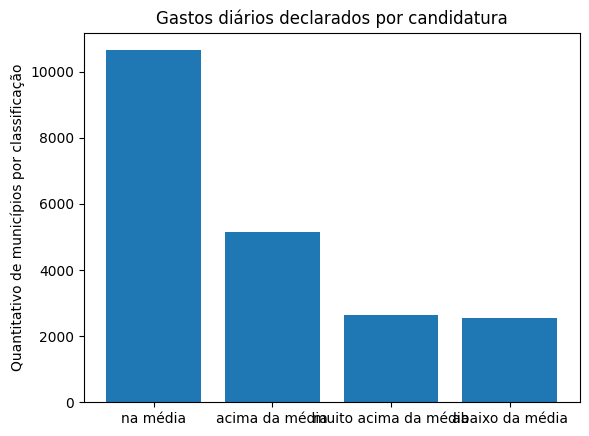

In [60]:
plt.bar(classificacao, total_por_classificacao)
plt.title('Gastos diários declarados por candidatura')
plt.ylabel('Quantitativo de municípios por classificação')

plt.show()

### Aula 15: Operações com dados e método `groupby`

Usando o método groupby podemos agrupar dados segundo informações de uma coluna e fazer operações com o agrupamento.

As perguntas que queremos responder são: quantas mulheres são candidatas? Qual a distribuição de pessoas por grupo racial? Quantidade de mulheres por grupo racial? E qual partido tem mais mulheres em cada grupo racial?


In [61]:
colunas_desejadas = ['SG_PARTIDO', 'DS_GENERO', 'DS_COR_RACA']
filtro = df_vereadores_ap_pa['SG_UF'] == 'AP'

In [62]:
df_vereadores_ap_sexo_raca = df_vereadores_ap_pa.loc[filtro, colunas_desejadas]

In [63]:
df_vereadores_ap_sexo_raca.head()

,SG_PARTIDO,DS_GENERO,DS_COR_RACA
0,PP,MASCULINO,PRETA
1,PT,MASCULINO,PARDA
2,PSD,MASCULINO,PRETA
4,PDT,MASCULINO,PARDA
5,PSL,MASCULINO,PARDA


Agrupando por gênero, quantas candidaturas temos em cada um?

In [64]:
df_vereadores_ap_sexo_raca.groupby(['DS_GENERO']).count()

,SG_PARTIDO,DS_COR_RACA
DS_GENERO,,
FEMININO,765,765
MASCULINO,1349,1349


E por raça?

In [65]:
df_vereadores_ap_sexo_raca.groupby(['DS_COR_RACA']).count()

,SG_PARTIDO,DS_GENERO
DS_COR_RACA,,
AMARELA,3,3
BRANCA,300,300
INDÍGENA,22,22
NÃO INFORMADO,4,4
PARDA,1544,1544
PRETA,241,241


Da candidaturas do gênero feminino, quantas temos em cada grupo racial?

In [67]:
df_vereadores_ap_sexo_raca[df_vereadores_ap_sexo_raca['DS_GENERO'] == 'FEMININO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).count()

SG_PARTIDO
DS_GENERO DS_COR_RACA              
FEMININO  AMARELA                 2
          BRANCA                103
          INDÍGENA                5
          NÃO INFORMADO           1
          PARDA                 575
          PRETA                  79

Entre as candidaturas do gênero feminino, quais os partidos com maior número de representação em cada grupo racial?

In [68]:
df_vereadores_ap_sexo_raca[df_vereadores_ap_sexo_raca['DS_GENERO'] == 'FEMININO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).max()

SG_PARTIDO
DS_GENERO DS_COR_RACA                 
FEMININO  AMARELA                  PTB
          BRANCA         SOLIDARIEDADE
          INDÍGENA        REPUBLICANOS
          NÃO INFORMADO            PDT
          PARDA          SOLIDARIEDADE
          PRETA           REPUBLICANOS

## Agora é a sua vez, entre as candidaturas do sexo masculino, quais os partidos com o menor número de representantes em cada grupo racial?

In [69]:
df_vereadores_ap_sexo_raca[df_vereadores_ap_sexo_raca['DS_GENERO'] == 'MASCULINO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).min()

SG_PARTIDO
DS_GENERO DS_COR_RACA             
MASCULINO AMARELA             PRTB
          BRANCA            AVANTE
          INDÍGENA             DEM
          NÃO INFORMADO        MDB
          PARDA             AVANTE
          PRETA          CIDADANIA